In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
x = np.random.random((1000,))*10

lineCoeffs = np.array([1, 4.5])

pv = 0.85

weirdNoise = np.array([(np.random.random())*15 if np.random.random() < pv else 0. for _ in range(x.shape[0])])
y = lineCoeffs[0]*x + lineCoeffs[1] + np.random.normal(0, 1, x.shape) + weirdNoise



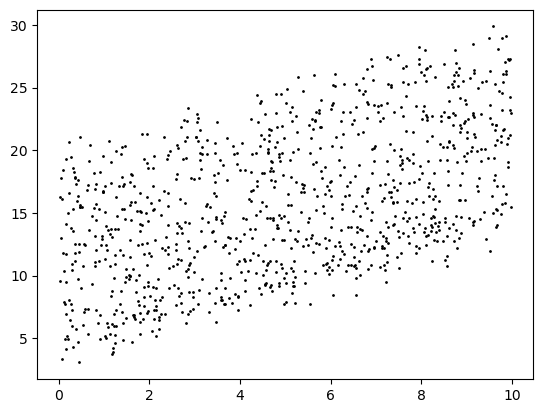

In [3]:
plt.scatter(x, y, s = 1, c='black')

Проведём прямую

In [4]:
from sklearn.linear_model import LinearRegression, Ridge

In [5]:
x = [[x[i]] for i in range(len(x))]

In [6]:
regressor = RANSACRegressor().fit(x, y)
y_predicted = regressor.predict(x)

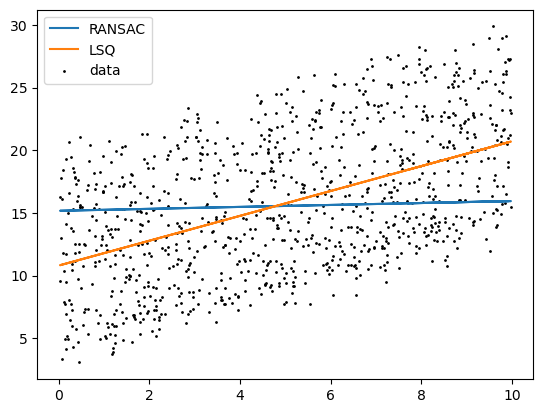

In [7]:
plt.scatter(x, y, s=1, label='data', c='black')
plt.plot(x, y_predicted, label='RANSAC')
plt.plot(x, LinearRegression().fit(x,y).predict(x), label='LSQ')
# plt.plot(x, Ridge().fit(x,y).predict(x), label='L2')
plt.legend()

### ДЗ: шумный круг

In [17]:
# Параметры для обучения
r = 1
sigma = 1e-1
size = 1000
target = np.empty((size, 2))

angle = np.random.random((size,))*2*np.pi

target[:, 0] = np.cos(angle) + np.random.normal(0, sigma, (size, ))
target[:, 1] = np.sin(angle) + np.random.normal(0, sigma, (size, ))

(-1.1, 1.1)

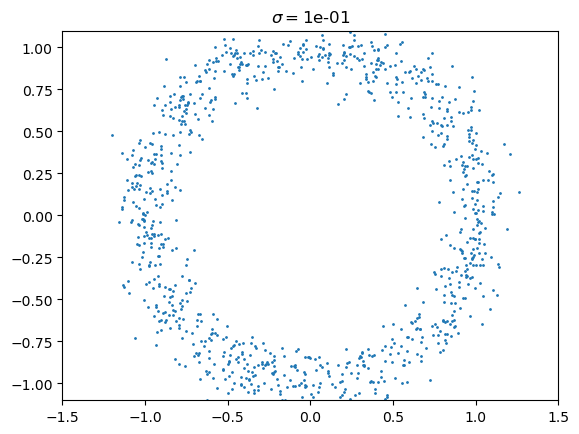

In [18]:
plt.scatter(target[:,0], target[:,1], 1)
plt.title(f"$\sigma=${sigma:.0e}")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.1, 1.1)

In [19]:
from regModel import Regression

In [20]:
regression = Regression(learning_rate=1e-1,max_iter=1000, early_stop_eps=1e-3).fit(np.array([[a] for a in angle]), target)


In [21]:
predicted = regression.predict(angle)

Text(0.5, 0, 'эпоха')

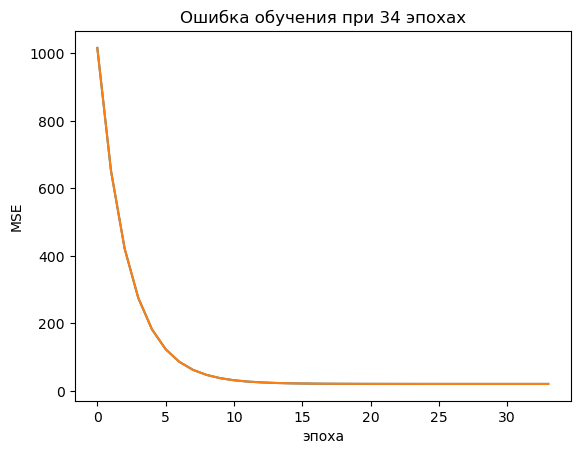

In [22]:
plt.plot(regression.loss)
plt.title(f'Ошибка обучения при {regression.iter} эпохах')
plt.plot(regression.loss)
plt.ylabel('MSE')
plt.xlabel('эпоха')

(-1.1, 1.1)

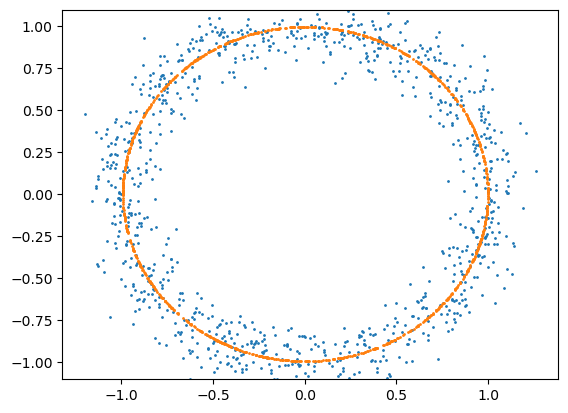

In [23]:
plt.scatter(target[:, 0], target[:, 1], 1, label='эксп. данные')
plt.scatter(predicted[:, 0], predicted[:,1], 1, label='предсказание')
plt.ylim(-1.1, 1.1)

In [24]:
print('predicted:')
print(f'radius: {regression.R:.4f}')
print(f'center: ({regression.C[0]:.4f}, {regression.C[1]:.4f})')

predicted:
radius: 0.9953
center: (0.0031, 0.0032)
